In [1]:
import pandas as pd

In [2]:
xyz = pd.read_csv('train_bodies.csv') #Load train dataset
print(xyz.head(1))

   Body ID                                        articleBody
0        0  A small meteorite crashed into a wooded area i...


In [3]:
abc = pd.read_csv('test_bodies.csv') #Load test dataset
print(abc.head(1))

   Body ID                                        articleBody Stance
0        1  Al-Sisi has denied Israeli reports stating tha...   Fake


In [7]:
# required packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
import math
import gensim
import logging
import warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [11]:
data=pd.read_csv('train_bodies.csv')
alltext=list(data['articleBody'])

In [12]:
string_punctuation="!\"#$%&'()*+,O-—.’/:;<=>?@[\]^_`{|}~“”"
string_punctuation=list(string_punctuation)   
string_punctuation.append('...')
string_punctuation.append('*')
string_punctuation.append('``')
string_punctuation.append("''")
print(string_punctuation)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', 'O', '-', '—', '.', '’', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '“', '”', '...', '*', '``', "''"]


In [13]:
def preprocess(input_txt):
    result = re.sub(r'\d+','', input_txt)
    result = re.sub('\S*@\S*\s?', '', input_txt)  # remove emails
    result = re.sub('\s+', ' ', input_txt)  # remove newline chars
    result = re.sub("\'", "", input_txt)  # remove single quotes
    tokens = word_tokenize(result)
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    #print("TOKENS:"tokens)

    from nltk.stem.porter import PorterStemmer
    porter = PorterStemmer()
    stems = []
    for t in tokens:    
        stems.append(porter.stem(t))
    #print('after stemming:'stems)
    
    for symbol in stems:
        if symbol in string_punctuation:
            stems.remove(symbol)
    return stems

In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/umamaheshwaramanchi/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/umamaheshwaramanchi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
data = []
for i in range(len(alltext)):
    preprocessed_text = preprocess(alltext[i])
    # Join the preprocessed text into a single string
    preprocessed_text = ' '.join(preprocessed_text)
    data.append(preprocessed_text)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

In [22]:
terms = tfidf_vectorizer.get_feature_names()
print(terms)

['00', '000', '000000', '000ft', '000km', '00144feab7de', '005', '0054321535', '005930', '009', '00am', '00pm', '01', '01am', '02', '02pm', '03', '030', '0300', '03000', '0325', '04', '0400', '044', '04am', '05', '0500', '053', '05am', '06', '066570', '07', '070', '08', '0800', '084', '09', '0l2sis54hv', '10', '100', '1000', '10000', '100k', '100m', '100th', '101', '101st', '102', '103k', '104', '105', '106', '107', '107mm', '108th', '10am', '10gbp', '10in', '10k', '10m', '10pm', '10sqm', '10th', '11', '110', '111', '112', '113', '11am', '11e4', '11in', '11pm', '11th', '12', '120', '1200', '1200hp', '122', '12345678', '125', '126', '127', '127kg', '128', '128gb', '12am', '12g', '12in', '12m', '12th', '13', '130', '1300', '131', '132', '1324', '133', '135', '1351', '1366', '138', '13am', '13ft', '13in', '13th', '14', '140', '1400', '1440', '1441', '145', '149', '14nm', '14th', '15', '150', '1500', '1536', '155', '156mm', '157', '159339', '159th', '15metr', '15st', '15th', '16', '160', '

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
value2=tfidf_matrix[0]
df=pd.DataFrame(value2.T.todense(),index=tfidf_vectorizer.get_feature_names(),columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
meteorit,0.338279
studi,0.213314
nicaragua,0.205752
asteroid,0.204336
crater,0.202967
...,...
fed,0.000000
feder,0.000000
federicofoto,0.000000
fee,0.000000


In [24]:
kmeans = KMeans(n_clusters=50).fit(tfidf_matrix)
print(kmeans.labels_)

[17 27 46 ...  3 29 43]


In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [27]:
centers=kmeans.cluster_centers_
print(centers)
print(centers.shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00745889 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00769151 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(50, 16796)


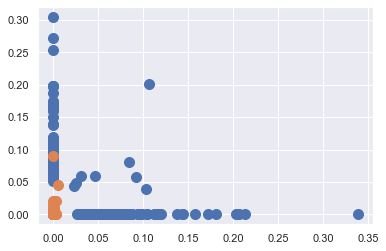

In [28]:
plt.scatter(tfidf_matrix[0].toarray(),tfidf_matrix[1].toarray(),s=100)
plt.scatter(centers[:, 0], centers[:, 1], s=100)

In [29]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(50):
    print("Cluster %d:" % i)
    k=[]
    for ind in order_centroids[i, :30]:
        k.append(terms[ind])
    print(k)   

Cluster 0:
['hain', 'david', 'behead', 'aid', 'video', 'british', 'worker', 'cameron', 'show', 'releas', 'uk', 'isi', 'minist', 'prime', 'execut', 'state', 'work', 'the', 'is', 'murder', 'islam', 'isil', 'condemn', 'shown', 'purportedli', 'unconfirm', 'unverifi', 'multipl', 'purport', 'confirm']
Cluster 1:
['son', 'abdulla', 'isi', 'is', 'yasir', 'meal', 'meat', 'yorkshir', 'rice', 'fed', 'eaten', 'scare', 'islam', 'kurdish', 'said', 'finish', 'fight', 'cook', 'chop', 'mr', 'aliv', 'see', 'iraq', 'group', 'headquart', 'went', 'mosul', 'kurdistan', 'soup', 'she']
Cluster 2:
['isi', 'islam', 'syrian', 'state', 'said', 'group', 'syria', 'jordanian', 'pilot', 'mueller', 'weapon', 'fighter', 'the', 'kobani', 'milit', 'king', 'militari', 'al', 'jordan', 'kurdish', 'air', 'build', 'fli', 'airstrik', 'airdrop', 'town', 'is', 'iraqi', 'video', 'plane']
Cluster 3:
['haram', 'boko', 'girl', 'nigeria', 'nigerian', 'ceasefir', 'govern', 'kidnap', 'releas', 'schoolgirl', 'shekau', 'group', 'negoti',

In [30]:
from pprint import pprint
cluster8=[]
order_centroids1 = kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(50):
    cluster=[]
    for ind in order_centroids1[i, :]:
        cluster.append(terms[ind])
    cluster8.append(cluster)
print(cluster8)  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [31]:
for i in range(50):    
    clusters=[]
    clusters.append(cluster8[i])
    print(clusters)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [32]:
def findtopic(i):  
    clusters=[]
    clusters.append(cluster8[i])
    #print(clusters)

    id2word = corpora.Dictionary(clusters)

    corpus = [id2word.doc2bow(text) for text in clusters]


    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=50, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=1,
                                               alpha='symmetric',
                                               iterations=20,
                                               per_word_topics=True)

    pprint(lda_model.print_topics())
    del corpus,lda_model,clusters

In [33]:
for i in range(50):
    findtopic(i)

[(31,
  '0.000*"sell" + 0.000*"simplic" + 0.000*"turf" + 0.000*"swift" + '
  '0.000*"footag" + 0.000*"leaker" + 0.000*"q7qjsgokb9" + 0.000*"vgproduct" + '
  '0.000*"twitterfacebooklinkedinredditgoogle" + 0.000*"brainwash"'),
 (10,
  '0.000*"capita" + 0.000*"cod" + 0.000*"grandson" + 0.000*"mcmanu" + '
  '0.000*"chicago" + 0.000*"taugan" + 0.000*"rapper" + 0.000*"sand" + '
  '0.000*"partnership" + 0.000*"if"'),
 (35,
  '0.000*"bankrol" + 0.000*"photon" + 0.000*"egyptian" + 0.000*"latim" + '
  '0.000*"clash" + 0.000*"within" + 0.000*"goodby" + 0.000*"di" + '
  '0.000*"consist" + 0.000*"vegas"'),
 (43,
  '0.000*"chipmunk" + 0.000*"inflexwetrust" + 0.000*"mire" + 0.000*"krauss" + '
  '0.000*"reliant" + 0.000*"officially" + 0.000*"canton" + 0.000*"speck" + '
  '0.000*"malaria" + 0.000*"audienc"'),
 (46,
  '0.000*"publicist" + 0.000*"hallucinogen" + 0.000*"outweigh" + '
  '0.000*"chartier" + 0.000*"fqlykvxrct" + 0.000*"martyrdom" + 0.000*"fout" + '
  '0.000*"sadden" + 0.000*"palmrest" + 0.00

  '+ 0.000*"samarrai" + 0.000*"deadliest"'),
 (30,
  '0.000*"recaptur" + 0.000*"sk" + 0.000*"eyour" + 0.000*"harden" + '
  '0.000*"padding" + 0.000*"mash" + 0.000*"personifi" + 0.000*"sandpit" + '
  '0.000*"anaheim" + 0.000*"likeliest"'),
 (28,
  '0.000*"quinn" + 0.000*"shit" + 0.000*"gastropod" + 0.000*"dorsal" + '
  '0.000*"years" + 0.000*"eagl" + 0.000*"bushmeat" + 0.000*"swarm" + '
  '0.000*"stuck" + 0.000*"hustl"'),
 (23,
  '0.000*"deandr" + 0.000*"developing" + 0.000*"unflinch" + 0.000*"ayr" + '
  '0.000*"treat" + 0.000*"coax" + 0.000*"screen" + 0.000*"quickly" + '
  '0.000*"audiotap" + 0.000*"barn"'),
 (7,
  '0.000*"soldi" + 0.000*"beefed" + 0.000*"fundrais" + 0.000*"engag" + '
  '0.000*"commit" + 0.000*"unaffili" + 0.000*"7z1hdukunp" + 0.000*"jeep" + '
  '0.000*"getting" + 0.000*"johnson"'),
 (41,
  '0.000*"din" + 0.000*"vantag" + 0.000*"span" + 0.000*"helm" + '
  '0.000*"balandin" + 0.000*"wick" + 0.000*"789" + 0.000*"tyre" + '
  '0.000*"saleh" + 0.000*"satirist"')]
[(31,
  '0

  '0.000*"twitterfacebooklinkedinredditgoogle" + 0.000*"brainwash"'),
 (10,
  '0.000*"capita" + 0.000*"cod" + 0.000*"grandson" + 0.000*"mcmanu" + '
  '0.000*"chicago" + 0.000*"taugan" + 0.000*"rapper" + 0.000*"sand" + '
  '0.000*"partnership" + 0.000*"if"'),
 (35,
  '0.000*"bankrol" + 0.000*"photon" + 0.000*"egyptian" + 0.000*"latim" + '
  '0.000*"clash" + 0.000*"within" + 0.000*"goodby" + 0.000*"di" + '
  '0.000*"consist" + 0.000*"vegas"'),
 (43,
  '0.000*"chipmunk" + 0.000*"inflexwetrust" + 0.000*"mire" + 0.000*"krauss" + '
  '0.000*"reliant" + 0.000*"officially" + 0.000*"canton" + 0.000*"speck" + '
  '0.000*"malaria" + 0.000*"audienc"'),
 (46,
  '0.000*"publicist" + 0.000*"hallucinogen" + 0.000*"outweigh" + '
  '0.000*"chartier" + 0.000*"fqlykvxrct" + 0.000*"martyrdom" + 0.000*"fout" + '
  '0.000*"sadden" + 0.000*"palmrest" + 0.000*"whisky"'),
 (17,
  '0.000*"surpris" + 0.000*"shortcom" + 0.000*"leak" + 0.000*"eyesight" + '
  '0.000*"bride" + 0.000*"reinvigor" + 0.000*"jaim" + 0.000

  '0.000*"pinhol" + 0.000*"riv" + 0.000*"reteam" + 0.000*"inflamm" + '
  '0.000*"airpow" + 0.000*"02pm"'),
 (34,
  '0.000*"legisl" + 0.000*"apple" + 0.000*"smartest" + 0.000*"laguna" + '
  '0.000*"actress" + 0.000*"solomon" + 0.000*"vigor" + 0.000*"berger" + '
  '0.000*"reckon" + 0.000*"joelzlandau"'),
 (6,
  '0.000*"tingl" + 0.000*"lusti" + 0.000*"tatiana" + 0.000*"channel" + '
  '0.000*"abana" + 0.000*"borough" + 0.000*"405" + 0.000*"pei" + '
  '0.000*"backfir" + 0.000*"bo"'),
 (4,
  '0.000*"delici" + 0.000*"75" + 0.000*"covered" + 0.000*"staircas" + '
  '0.000*"fly" + 0.000*"somer" + 0.000*"ir" + 0.000*"12345678" + '
  '0.000*"christoph" + 0.000*"partial"'),
 (32,
  '0.000*"reynold" + 0.000*"immedi" + 0.000*"liverpool" + 0.000*"nobilo" + '
  '0.000*"paypal" + 0.000*"darpa" + 0.000*"1979" + 0.000*"safely" + '
  '0.000*"crdpjplbb8" + 0.000*"lucki"'),
 (9,
  '0.000*"fatti" + 0.000*"twournal" + 0.000*"superimpos" + 0.000*"thankyou" + '
  '0.000*"bulldoz" + 0.000*"poker" + 0.000*"trainin

[(31,
  '0.000*"sell" + 0.000*"simplic" + 0.000*"turf" + 0.000*"swift" + '
  '0.000*"footag" + 0.000*"leaker" + 0.000*"q7qjsgokb9" + 0.000*"vgproduct" + '
  '0.000*"twitterfacebooklinkedinredditgoogle" + 0.000*"brainwash"'),
 (10,
  '0.000*"capita" + 0.000*"cod" + 0.000*"grandson" + 0.000*"mcmanu" + '
  '0.000*"chicago" + 0.000*"taugan" + 0.000*"rapper" + 0.000*"sand" + '
  '0.000*"partnership" + 0.000*"if"'),
 (35,
  '0.000*"bankrol" + 0.000*"photon" + 0.000*"egyptian" + 0.000*"latim" + '
  '0.000*"clash" + 0.000*"within" + 0.000*"goodby" + 0.000*"di" + '
  '0.000*"consist" + 0.000*"vegas"'),
 (43,
  '0.000*"chipmunk" + 0.000*"inflexwetrust" + 0.000*"mire" + 0.000*"krauss" + '
  '0.000*"reliant" + 0.000*"officially" + 0.000*"canton" + 0.000*"speck" + '
  '0.000*"malaria" + 0.000*"audienc"'),
 (46,
  '0.000*"publicist" + 0.000*"hallucinogen" + 0.000*"outweigh" + '
  '0.000*"chartier" + 0.000*"fqlykvxrct" + 0.000*"martyrdom" + 0.000*"fout" + '
  '0.000*"sadden" + 0.000*"palmrest" + 0.00

[(31,
  '0.000*"sell" + 0.000*"simplic" + 0.000*"turf" + 0.000*"swift" + '
  '0.000*"footag" + 0.000*"leaker" + 0.000*"q7qjsgokb9" + 0.000*"vgproduct" + '
  '0.000*"twitterfacebooklinkedinredditgoogle" + 0.000*"brainwash"'),
 (10,
  '0.000*"capita" + 0.000*"cod" + 0.000*"grandson" + 0.000*"mcmanu" + '
  '0.000*"chicago" + 0.000*"taugan" + 0.000*"rapper" + 0.000*"sand" + '
  '0.000*"partnership" + 0.000*"if"'),
 (35,
  '0.000*"bankrol" + 0.000*"photon" + 0.000*"egyptian" + 0.000*"latim" + '
  '0.000*"clash" + 0.000*"within" + 0.000*"goodby" + 0.000*"di" + '
  '0.000*"consist" + 0.000*"vegas"'),
 (43,
  '0.000*"chipmunk" + 0.000*"inflexwetrust" + 0.000*"mire" + 0.000*"krauss" + '
  '0.000*"reliant" + 0.000*"officially" + 0.000*"canton" + 0.000*"speck" + '
  '0.000*"malaria" + 0.000*"audienc"'),
 (46,
  '0.000*"publicist" + 0.000*"hallucinogen" + 0.000*"outweigh" + '
  '0.000*"chartier" + 0.000*"fqlykvxrct" + 0.000*"martyrdom" + 0.000*"fout" + '
  '0.000*"sadden" + 0.000*"palmrest" + 0.00

[(31,
  '0.000*"sell" + 0.000*"simplic" + 0.000*"turf" + 0.000*"swift" + '
  '0.000*"footag" + 0.000*"leaker" + 0.000*"q7qjsgokb9" + 0.000*"vgproduct" + '
  '0.000*"twitterfacebooklinkedinredditgoogle" + 0.000*"brainwash"'),
 (10,
  '0.000*"capita" + 0.000*"cod" + 0.000*"grandson" + 0.000*"mcmanu" + '
  '0.000*"chicago" + 0.000*"taugan" + 0.000*"rapper" + 0.000*"sand" + '
  '0.000*"partnership" + 0.000*"if"'),
 (35,
  '0.000*"bankrol" + 0.000*"photon" + 0.000*"egyptian" + 0.000*"latim" + '
  '0.000*"clash" + 0.000*"within" + 0.000*"goodby" + 0.000*"di" + '
  '0.000*"consist" + 0.000*"vegas"'),
 (43,
  '0.000*"chipmunk" + 0.000*"inflexwetrust" + 0.000*"mire" + 0.000*"krauss" + '
  '0.000*"reliant" + 0.000*"officially" + 0.000*"canton" + 0.000*"speck" + '
  '0.000*"malaria" + 0.000*"audienc"'),
 (46,
  '0.000*"publicist" + 0.000*"hallucinogen" + 0.000*"outweigh" + '
  '0.000*"chartier" + 0.000*"fqlykvxrct" + 0.000*"martyrdom" + 0.000*"fout" + '
  '0.000*"sadden" + 0.000*"palmrest" + 0.00

[(31,
  '0.000*"sell" + 0.000*"simplic" + 0.000*"turf" + 0.000*"swift" + '
  '0.000*"footag" + 0.000*"leaker" + 0.000*"q7qjsgokb9" + 0.000*"vgproduct" + '
  '0.000*"twitterfacebooklinkedinredditgoogle" + 0.000*"brainwash"'),
 (10,
  '0.000*"capita" + 0.000*"cod" + 0.000*"grandson" + 0.000*"mcmanu" + '
  '0.000*"chicago" + 0.000*"taugan" + 0.000*"rapper" + 0.000*"sand" + '
  '0.000*"partnership" + 0.000*"if"'),
 (35,
  '0.000*"bankrol" + 0.000*"photon" + 0.000*"egyptian" + 0.000*"latim" + '
  '0.000*"clash" + 0.000*"within" + 0.000*"goodby" + 0.000*"di" + '
  '0.000*"consist" + 0.000*"vegas"'),
 (43,
  '0.000*"chipmunk" + 0.000*"inflexwetrust" + 0.000*"mire" + 0.000*"krauss" + '
  '0.000*"reliant" + 0.000*"officially" + 0.000*"canton" + 0.000*"speck" + '
  '0.000*"malaria" + 0.000*"audienc"'),
 (46,
  '0.000*"publicist" + 0.000*"hallucinogen" + 0.000*"outweigh" + '
  '0.000*"chartier" + 0.000*"fqlykvxrct" + 0.000*"martyrdom" + 0.000*"fout" + '
  '0.000*"sadden" + 0.000*"palmrest" + 0.00

[(31,
  '0.000*"sell" + 0.000*"simplic" + 0.000*"turf" + 0.000*"swift" + '
  '0.000*"footag" + 0.000*"leaker" + 0.000*"q7qjsgokb9" + 0.000*"vgproduct" + '
  '0.000*"twitterfacebooklinkedinredditgoogle" + 0.000*"brainwash"'),
 (10,
  '0.000*"capita" + 0.000*"cod" + 0.000*"grandson" + 0.000*"mcmanu" + '
  '0.000*"chicago" + 0.000*"taugan" + 0.000*"rapper" + 0.000*"sand" + '
  '0.000*"partnership" + 0.000*"if"'),
 (35,
  '0.000*"bankrol" + 0.000*"photon" + 0.000*"egyptian" + 0.000*"latim" + '
  '0.000*"clash" + 0.000*"within" + 0.000*"goodby" + 0.000*"di" + '
  '0.000*"consist" + 0.000*"vegas"'),
 (43,
  '0.000*"chipmunk" + 0.000*"inflexwetrust" + 0.000*"mire" + 0.000*"krauss" + '
  '0.000*"reliant" + 0.000*"officially" + 0.000*"canton" + 0.000*"speck" + '
  '0.000*"malaria" + 0.000*"audienc"'),
 (46,
  '0.000*"publicist" + 0.000*"hallucinogen" + 0.000*"outweigh" + '
  '0.000*"chartier" + 0.000*"fqlykvxrct" + 0.000*"martyrdom" + 0.000*"fout" + '
  '0.000*"sadden" + 0.000*"palmrest" + 0.00

[(31,
  '0.000*"sell" + 0.000*"simplic" + 0.000*"turf" + 0.000*"swift" + '
  '0.000*"footag" + 0.000*"leaker" + 0.000*"q7qjsgokb9" + 0.000*"vgproduct" + '
  '0.000*"twitterfacebooklinkedinredditgoogle" + 0.000*"brainwash"'),
 (10,
  '0.000*"capita" + 0.000*"cod" + 0.000*"grandson" + 0.000*"mcmanu" + '
  '0.000*"chicago" + 0.000*"taugan" + 0.000*"rapper" + 0.000*"sand" + '
  '0.000*"partnership" + 0.000*"if"'),
 (35,
  '0.000*"bankrol" + 0.000*"photon" + 0.000*"egyptian" + 0.000*"latim" + '
  '0.000*"clash" + 0.000*"within" + 0.000*"goodby" + 0.000*"di" + '
  '0.000*"consist" + 0.000*"vegas"'),
 (43,
  '0.000*"chipmunk" + 0.000*"inflexwetrust" + 0.000*"mire" + 0.000*"krauss" + '
  '0.000*"reliant" + 0.000*"officially" + 0.000*"canton" + 0.000*"speck" + '
  '0.000*"malaria" + 0.000*"audienc"'),
 (46,
  '0.000*"publicist" + 0.000*"hallucinogen" + 0.000*"outweigh" + '
  '0.000*"chartier" + 0.000*"fqlykvxrct" + 0.000*"martyrdom" + 0.000*"fout" + '
  '0.000*"sadden" + 0.000*"palmrest" + 0.00

[(31,
  '0.000*"sell" + 0.000*"simplic" + 0.000*"turf" + 0.000*"swift" + '
  '0.000*"footag" + 0.000*"leaker" + 0.000*"q7qjsgokb9" + 0.000*"vgproduct" + '
  '0.000*"twitterfacebooklinkedinredditgoogle" + 0.000*"brainwash"'),
 (10,
  '0.000*"capita" + 0.000*"cod" + 0.000*"grandson" + 0.000*"mcmanu" + '
  '0.000*"chicago" + 0.000*"taugan" + 0.000*"rapper" + 0.000*"sand" + '
  '0.000*"partnership" + 0.000*"if"'),
 (35,
  '0.000*"bankrol" + 0.000*"photon" + 0.000*"egyptian" + 0.000*"latim" + '
  '0.000*"clash" + 0.000*"within" + 0.000*"goodby" + 0.000*"di" + '
  '0.000*"consist" + 0.000*"vegas"'),
 (43,
  '0.000*"chipmunk" + 0.000*"inflexwetrust" + 0.000*"mire" + 0.000*"krauss" + '
  '0.000*"reliant" + 0.000*"officially" + 0.000*"canton" + 0.000*"speck" + '
  '0.000*"malaria" + 0.000*"audienc"'),
 (46,
  '0.000*"publicist" + 0.000*"hallucinogen" + 0.000*"outweigh" + '
  '0.000*"chartier" + 0.000*"fqlykvxrct" + 0.000*"martyrdom" + 0.000*"fout" + '
  '0.000*"sadden" + 0.000*"palmrest" + 0.00

[(31,
  '0.000*"sell" + 0.000*"simplic" + 0.000*"turf" + 0.000*"swift" + '
  '0.000*"footag" + 0.000*"leaker" + 0.000*"q7qjsgokb9" + 0.000*"vgproduct" + '
  '0.000*"twitterfacebooklinkedinredditgoogle" + 0.000*"brainwash"'),
 (10,
  '0.000*"capita" + 0.000*"cod" + 0.000*"grandson" + 0.000*"mcmanu" + '
  '0.000*"chicago" + 0.000*"taugan" + 0.000*"rapper" + 0.000*"sand" + '
  '0.000*"partnership" + 0.000*"if"'),
 (35,
  '0.000*"bankrol" + 0.000*"photon" + 0.000*"egyptian" + 0.000*"latim" + '
  '0.000*"clash" + 0.000*"within" + 0.000*"goodby" + 0.000*"di" + '
  '0.000*"consist" + 0.000*"vegas"'),
 (43,
  '0.000*"chipmunk" + 0.000*"inflexwetrust" + 0.000*"mire" + 0.000*"krauss" + '
  '0.000*"reliant" + 0.000*"officially" + 0.000*"canton" + 0.000*"speck" + '
  '0.000*"malaria" + 0.000*"audienc"'),
 (46,
  '0.000*"publicist" + 0.000*"hallucinogen" + 0.000*"outweigh" + '
  '0.000*"chartier" + 0.000*"fqlykvxrct" + 0.000*"martyrdom" + 0.000*"fout" + '
  '0.000*"sadden" + 0.000*"palmrest" + 0.00

  '0.000*"padding" + 0.000*"mash" + 0.000*"personifi" + 0.000*"sandpit" + '
  '0.000*"anaheim" + 0.000*"likeliest"'),
 (28,
  '0.000*"quinn" + 0.000*"shit" + 0.000*"gastropod" + 0.000*"dorsal" + '
  '0.000*"years" + 0.000*"eagl" + 0.000*"bushmeat" + 0.000*"swarm" + '
  '0.000*"stuck" + 0.000*"hustl"'),
 (23,
  '0.000*"deandr" + 0.000*"developing" + 0.000*"unflinch" + 0.000*"ayr" + '
  '0.000*"treat" + 0.000*"coax" + 0.000*"screen" + 0.000*"quickly" + '
  '0.000*"audiotap" + 0.000*"barn"'),
 (7,
  '0.000*"soldi" + 0.000*"beefed" + 0.000*"fundrais" + 0.000*"engag" + '
  '0.000*"commit" + 0.000*"unaffili" + 0.000*"7z1hdukunp" + 0.000*"jeep" + '
  '0.000*"getting" + 0.000*"johnson"'),
 (41,
  '0.000*"din" + 0.000*"vantag" + 0.000*"span" + 0.000*"helm" + '
  '0.000*"balandin" + 0.000*"wick" + 0.000*"789" + 0.000*"tyre" + '
  '0.000*"saleh" + 0.000*"satirist"')]
[(31,
  '0.000*"sell" + 0.000*"simplic" + 0.000*"turf" + 0.000*"swift" + '
  '0.000*"footag" + 0.000*"leaker" + 0.000*"q7qjsgokb9" 

  '0.000*"barcelona" + 0.000*"miscarriag"'),
 (16,
  '0.000*"starlet" + 0.000*"查看更多请返回网站主页" + 0.000*"khan" + 0.000*"predecessor" '
  '+ 0.000*"matthew" + 0.000*"allegations" + 0.000*"whichev" + 0.000*"sigint" '
  '+ 0.000*"samarrai" + 0.000*"deadliest"'),
 (30,
  '0.000*"recaptur" + 0.000*"sk" + 0.000*"eyour" + 0.000*"harden" + '
  '0.000*"padding" + 0.000*"mash" + 0.000*"personifi" + 0.000*"sandpit" + '
  '0.000*"anaheim" + 0.000*"likeliest"'),
 (28,
  '0.000*"quinn" + 0.000*"shit" + 0.000*"gastropod" + 0.000*"dorsal" + '
  '0.000*"years" + 0.000*"eagl" + 0.000*"bushmeat" + 0.000*"swarm" + '
  '0.000*"stuck" + 0.000*"hustl"'),
 (23,
  '0.000*"deandr" + 0.000*"developing" + 0.000*"unflinch" + 0.000*"ayr" + '
  '0.000*"treat" + 0.000*"coax" + 0.000*"screen" + 0.000*"quickly" + '
  '0.000*"audiotap" + 0.000*"barn"'),
 (7,
  '0.000*"soldi" + 0.000*"beefed" + 0.000*"fundrais" + 0.000*"engag" + '
  '0.000*"commit" + 0.000*"unaffili" + 0.000*"7z1hdukunp" + 0.000*"jeep" + '
  '0.000*"getting"

[(31,
  '0.000*"sell" + 0.000*"simplic" + 0.000*"turf" + 0.000*"swift" + '
  '0.000*"footag" + 0.000*"leaker" + 0.000*"q7qjsgokb9" + 0.000*"vgproduct" + '
  '0.000*"twitterfacebooklinkedinredditgoogle" + 0.000*"brainwash"'),
 (10,
  '0.000*"capita" + 0.000*"cod" + 0.000*"grandson" + 0.000*"mcmanu" + '
  '0.000*"chicago" + 0.000*"taugan" + 0.000*"rapper" + 0.000*"sand" + '
  '0.000*"partnership" + 0.000*"if"'),
 (35,
  '0.000*"bankrol" + 0.000*"photon" + 0.000*"egyptian" + 0.000*"latim" + '
  '0.000*"clash" + 0.000*"within" + 0.000*"goodby" + 0.000*"di" + '
  '0.000*"consist" + 0.000*"vegas"'),
 (43,
  '0.000*"chipmunk" + 0.000*"inflexwetrust" + 0.000*"mire" + 0.000*"krauss" + '
  '0.000*"reliant" + 0.000*"officially" + 0.000*"canton" + 0.000*"speck" + '
  '0.000*"malaria" + 0.000*"audienc"'),
 (46,
  '0.000*"publicist" + 0.000*"hallucinogen" + 0.000*"outweigh" + '
  '0.000*"chartier" + 0.000*"fqlykvxrct" + 0.000*"martyrdom" + 0.000*"fout" + '
  '0.000*"sadden" + 0.000*"palmrest" + 0.00

[(31,
  '0.000*"sell" + 0.000*"simplic" + 0.000*"turf" + 0.000*"swift" + '
  '0.000*"footag" + 0.000*"leaker" + 0.000*"q7qjsgokb9" + 0.000*"vgproduct" + '
  '0.000*"twitterfacebooklinkedinredditgoogle" + 0.000*"brainwash"'),
 (10,
  '0.000*"capita" + 0.000*"cod" + 0.000*"grandson" + 0.000*"mcmanu" + '
  '0.000*"chicago" + 0.000*"taugan" + 0.000*"rapper" + 0.000*"sand" + '
  '0.000*"partnership" + 0.000*"if"'),
 (35,
  '0.000*"bankrol" + 0.000*"photon" + 0.000*"egyptian" + 0.000*"latim" + '
  '0.000*"clash" + 0.000*"within" + 0.000*"goodby" + 0.000*"di" + '
  '0.000*"consist" + 0.000*"vegas"'),
 (43,
  '0.000*"chipmunk" + 0.000*"inflexwetrust" + 0.000*"mire" + 0.000*"krauss" + '
  '0.000*"reliant" + 0.000*"officially" + 0.000*"canton" + 0.000*"speck" + '
  '0.000*"malaria" + 0.000*"audienc"'),
 (46,
  '0.000*"publicist" + 0.000*"hallucinogen" + 0.000*"outweigh" + '
  '0.000*"chartier" + 0.000*"fqlykvxrct" + 0.000*"martyrdom" + 0.000*"fout" + '
  '0.000*"sadden" + 0.000*"palmrest" + 0.00

In [34]:
out=[
  "farticle" ,"catarina","devs" ,"mockups" ,"dominique" ,"viejo" ,"contact" ,
  "showering" ,"editors" ,"medically" ,
 
  "narrates" ,"conquered" ,"tangible" ,"frankly", 
  "pitbull" ,"cycles" ,"blogger" ,"dubai", 
  "climate" ,"tethering" ,
 
  "peppers" ,"pushback" ,"macaulay" ,"aborted" ,
  "seal" ,"arguing" ,"abroad" ,"streamline"  ,
  "flavours" ,"screams" ,
 
   "complements" ,"hardcover" ,"romanée" ,"reign"  ,
  "chant" ,"maps" ,"mubarak" ,"fgm"  ,
  "tatlas" ,"yelp" ,
 
 "32" ,"profound" ,"fit" ,"crosses"  ,
  "gyrometer" ,"inventec" ,"insert" ,"playground" , 
  "amber" ,"josephbraude" ,
  
  "duration" ,"featureless" ,"heartening" ,
  "pinned" ,"couch" ,"caper" ,"hatchets"  ,
  "veering" ,"facilitating" "eliott" ,
 
 "fondness" ,"tactically" ,"denuclearization"  ,
  "certified" ,"chanel" ,"vets" ,"goldgenie" , 
  "n1puexi7ir" ,"summary" ,"39ft" ,"anoth",
 
 "rectangular" ,"blindness" ,"abducting"  ,
  "blackjack" ,"michaud" ,"afar" ,"bus"  ,
  "transliterated" ,"atlantic" "wipe" ,
 
 "chastise" ,"stay" ,"meter" ,"simpler"  ,
  "stuck" ,"crusaders" ,"rep" ,"cafeteria" , 
  "reliable" ,"dreamworks" ,

 "assad" ,"anachronistic" ,"psvbtv6ovq"  ,
  "cubanamerican" ,"kabul" ,"lou" ,"singing" ,
  "accounting" ,"mateo" ,"ontario" ,
 
 "school" ,"bild" ,"terminated" ,"expert"  ,
  "regarded" ,"cooperate" ,"toss" ,"sticky"  ,
  "francesco" ,"hershberger" ,
 
 "themed" ,"crème" ,"astor" ,"dailybuzzlive" , 
  "pastor" ,"drastic" ,"barrier" "fork" ,
  "tower" "sometime" ,"islam" ,"snowi",
  
  "kill","owl","first","govern","foley",
"ransom","report","US","global",
"aleo",
"nino",
"warm","tropic","glyphos","studi","studi","caus",
"lenovo","canadian","compani","blackberri",
 
 "thermal" ,"transport" ,"espinal" ,"blurring"  ,
  "humane" ,"testament" ,"petrified" ,"choudary"  , 
  "spilt" "mursitpinar" , "student" ,
 
 "zaiser" ,"truthful" ,"withdraw" ,"aishwarya"  , 
 "corvette" "foretelling","state" "origins" ,"combines"  , 
  "corresponds" ,"hebraised" ,"kermit"
 
 "janella" ,"levitation" ,"giovani" ,"impromptu" , 
  "play" ,"customise" ,"particular" ,"statement","arms" , 
  
  
  "logged" "handgun" ,"steward",
  "rumor","cosbi","love","pleas","birthday","torpoint","alex","parti",
  
  "christian","transgend","suicid","age",

"hostag","dead","attack","commision","appl","imag","system","camera",
"watch","health","monitor","rate","tradit","argentin","jewish","presid",

"adopt","execut","buzzfe","sell","israel","saudi",
"flight","passeng","coalit","terrorist","weapon",

"iraq","point","store","model","knife","peni","qiang","aunt",
"group","buzzfe","told","lingeri","trap","resid","woman","african",

"khoza","south","video","syria","caliph","sotloff",
"american","journal","compani","street","would"
 
 "smartphone" ,"ecommerce" ,"emmental" ,
  "mismanagement" ,"electro" "struggled" ,
  "reunite" , "marshawn" , "ambient" , "uttar" ,
 
 "tasteless" ,"answering" ,"crawl" ,"bound" ,
  "coolness" ,"gallery" ,"spaceships" ,"rona" ,
  "addressed" , "joujoux", "mariam", "uae", "We", "nation",
 
 "gogalac1ma" ,"sexist" ,"ahmed" ,"surfing"  ,
"pleasing" ,"wants" ,"setup" ,"mansouri","shortlands" ,
  "pando" ,"swell" ,
 
 "gentlemen" "hatim" ,"yankee" ,"390" ,
  "carrots" ,"disapproval" ,"credits" ,"miserably" 
  "kazaryan" "reacting" ,
 
 "durex" ,"kong" ,"casual" ,"propulsion" , 
  "applauded" ,"savannah" ,"trump" ,"airpower" ,
  "situation" ,"scaffolding" ,]

In [35]:
out=list(out)
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
outtopics= []
for t in out:
    outtopics.append(porter.stem(t))
print(outtopics)

['farticl', 'catarina', 'dev', 'mockup', 'dominiqu', 'viejo', 'contact', 'shower', 'editor', 'medic', 'narrat', 'conquer', 'tangibl', 'frankli', 'pitbul', 'cycl', 'blogger', 'dubai', 'climat', 'tether', 'pepper', 'pushback', 'macaulay', 'abort', 'seal', 'argu', 'abroad', 'streamlin', 'flavour', 'scream', 'complement', 'hardcov', 'romané', 'reign', 'chant', 'map', 'mubarak', 'fgm', 'tatla', 'yelp', '32', 'profound', 'fit', 'cross', 'gyromet', 'inventec', 'insert', 'playground', 'amber', 'josephbraud', 'durat', 'featureless', 'hearten', 'pin', 'couch', 'caper', 'hatchet', 'veer', 'facilitatingeliott', 'fond', 'tactic', 'denuclear', 'certifi', 'chanel', 'vet', 'goldgeni', 'n1puexi7ir', 'summari', '39ft', 'anoth', 'rectangular', 'blind', 'abduct', 'blackjack', 'michaud', 'afar', 'bu', 'transliter', 'atlanticwip', 'chastis', 'stay', 'meter', 'simpler', 'stuck', 'crusad', 'rep', 'cafeteria', 'reliabl', 'dreamwork', 'assad', 'anachronist', 'psvbtv6ovq', 'cubanamerican', 'kabul', 'lou', 'sing'

In [37]:
data=pd.read_csv('test_bodies.csv')
alltesttext=list(data['articleBody'])
print(alltesttext[44])

UPDATE: Sod Crabzilla, Now Budapest Is Under Attack From A Furious Giant

Behold – there is a ocean-dwelling beast lurking off the shore of Whitstable.

Yes, the sleepy seaside town famed for its oysters and cream teas is now apparently home to a giant sea monster, which has rightly earned the moniker ‘Crabzilla’.

A satellite image of the colossal crustacean – thought to be 50ft across - surfaced on Weird Whitstable, an online journal dedicated to tall tales in the area.

Could it be...?

Blog curator Quinton Winter revealed to The Express he had encountered the decapod himself: “At first all I could see was some faint movement, then as it rose from the water I thought ‘that’s a funny looking bit of driftwood’.

“It had glazed blank eyes on stalks, swivelling wildly and it clearly was a massive crab with crushing claws.

“Before this incident I thought the aerial photo showed an odd-shaped sandbank. Now I know better.”

Winter first made reference to the giant crab in July last year w

In [38]:
test_data=[]
test_data.append(preprocess(alltesttext[44]))
print(test_data[0])

['updat', 'sod', 'crabzilla', 'now', 'budapest', 'is', 'under', 'attack', 'from', 'a', 'furiou', 'giant', 'behold', '–', 'ocean-dwel', 'beast', 'lurk', 'shore', 'whitstabl', 'ye', 'sleepi', 'seasid', 'town', 'fame', 'oyster', 'cream', 'tea', 'appar', 'home', 'giant', 'sea', 'monster', 'rightli', 'earn', 'monik', '‘', 'crabzilla', 'a', 'satellit', 'imag', 'coloss', 'crustacean', '–', 'thought', '50ft', 'across', 'surfac', 'weird', 'whitstabl', 'onlin', 'journal', 'dedic', 'tall', 'tale', 'area', 'could', '?', 'blog', 'curat', 'quinton', 'winter', 'reveal', 'the', 'express', 'encount', 'decapod', 'at', 'first', 'i', 'could', 'see', 'faint', 'movement', 'rose', 'water', 'i', 'thought', '‘', 'funni', 'look', 'bit', 'driftwood', '“', 'it', 'glaze', 'blank', 'eye', 'stalk', 'swivel', 'wildli', 'clearli', 'massiv', 'crab', 'crush', 'claw', '“', 'befor', 'incid', 'i', 'thought', 'aerial', 'photo', 'show', 'odd-shap', 'sandbank', 'now', 'i', 'know', 'better.', 'winter', 'first', 'made', 'refer'

In [39]:
id2word = corpora.Dictionary(test_data)
corpus = [id2word.doc2bow(text) for text in test_data]
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=1, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=10,
                                               passes=10,
                                               alpha='symmetric',
                                               iterations=100,
                                               per_word_topics=True)
pprint(lda_model.print_topics())

[(0,
  '0.027*"crab" + 0.017*"“" + 0.015*"imag" + 0.015*"giant" + 0.012*"water" + '
  '0.012*"i" + 0.010*"crabzilla" + 0.010*"‘" + 0.010*"the" + 0.010*"thought"')]


In [40]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=test_data):
    sent_topics_df = pd.DataFrame()

    
     # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return topic_keywords,sent_topics_df

In [41]:
keys,sent_topics_df = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=test_data)
test=list(keys.split(", "))
print(test)
print(sent_topics_df)

['crab', '“', 'imag', 'giant', 'water', 'i', 'crabzilla', '‘', 'the', 'thought']
   Dominant_Topic  Perc_Contribution  \
0               0                1.0   

                                      Topic_Keywords  \
0  crab, “, imag, giant, water, i, crabzilla, ‘, ...   

                                                   0  
0  [updat, sod, crabzilla, now, budapest, is, und...  


/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


In [42]:
print(outtopics)
print(test)

['farticl', 'catarina', 'dev', 'mockup', 'dominiqu', 'viejo', 'contact', 'shower', 'editor', 'medic', 'narrat', 'conquer', 'tangibl', 'frankli', 'pitbul', 'cycl', 'blogger', 'dubai', 'climat', 'tether', 'pepper', 'pushback', 'macaulay', 'abort', 'seal', 'argu', 'abroad', 'streamlin', 'flavour', 'scream', 'complement', 'hardcov', 'romané', 'reign', 'chant', 'map', 'mubarak', 'fgm', 'tatla', 'yelp', '32', 'profound', 'fit', 'cross', 'gyromet', 'inventec', 'insert', 'playground', 'amber', 'josephbraud', 'durat', 'featureless', 'hearten', 'pin', 'couch', 'caper', 'hatchet', 'veer', 'facilitatingeliott', 'fond', 'tactic', 'denuclear', 'certifi', 'chanel', 'vet', 'goldgeni', 'n1puexi7ir', 'summari', '39ft', 'anoth', 'rectangular', 'blind', 'abduct', 'blackjack', 'michaud', 'afar', 'bu', 'transliter', 'atlanticwip', 'chastis', 'stay', 'meter', 'simpler', 'stuck', 'crusad', 'rep', 'cafeteria', 'reliabl', 'dreamwork', 'assad', 'anachronist', 'psvbtv6ovq', 'cubanamerican', 'kabul', 'lou', 'sing'

In [43]:
def accuracy():
  l=[]
  count=0
  for i in range(0,904):
    test_data=[]
    test_data.append(preprocess(alltesttext[i]))
    id2word = corpora.Dictionary(test_data)
    corpus = [id2word.doc2bow(text) for text in test_data]
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=1, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=10,
                                               passes=10,
                                               alpha='symmetric',
                                               iterations=100,
                                               per_word_topics=True)
    keys,sent_topics_df = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=test_data)
    test=list(keys.split(", "))
    gsum=0
    for i in test:
      if i in outtopics:
        gsum=gsum+1
    gfinal=gsum/10
    threshold=0.4
    if gfinal<threshold:
      l.append(1)
    if gfinal>threshold:
      l.append(0)
    if gfinal==threshold:
      l.append(0)
  return l
l=accuracy()

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/nm/vlyl6z795qx2dwbxknxfl13m0000gn/T/ipykernel_5978/3093816485.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords

In [44]:
c=data['Stance']
ct=0
for i in range(0,904):
  if l[i]==1 and c[i]=='Fake':
    ct+=1
  if l[i]==0 and c[i]=='Legitimate':
    ct+=1
print('Accuracy:',ct*100/904)

Accuracy: 86.28318584070796
